In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import HiveContext
from pyspark.sql.functions import when
from pyspark.sql.functions import avg
from pyspark.sql.functions import datediff
from pyspark.sql.functions import to_date
from pyspark.sql.functions import substring


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('BDFinalProject').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

[('spark.stage.maxConsecutiveAttempts', '10'),
 ('spark.dynamicAllocation.minExecutors', '1'),
 ('spark.eventLog.enabled', 'true'),
 ('spark.dataproc.sql.joinConditionReorder.enabled', 'true'),
 ('spark.driver.port', '41041'),
 ('spark.dataproc.sql.local.rank.pushdown.enabled', 'true'),
 ('spark.yarn.unmanagedAM.enabled', 'true'),
 ('spark.sql.autoBroadcastJoinThreshold', '43m'),
 ('spark.ui.filters',
  'org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter'),
 ('spark.app.startTime', '1678150060077'),
 ('spark.eventLog.dir',
  'gs://dataproc-temp-us-central1-635155370842-uzamlpgc/8623512c-bd13-4f8b-aebd-789daf3b7037/spark-job-history'),
 ('spark.history.fs.logDirectory',
  'gs://dataproc-temp-us-central1-635155370842-uzamlpgc/8623512c-bd13-4f8b-aebd-789daf3b7037/spark-job-history'),
 ('spark.metrics.namespace',
  'app_name:${spark.app.name}.app_id:${spark.app.id}'),
 ('spark.executor.memory', '4g'),
 ('spark.dataproc.sql.optimizer.leftsemijoin.conversion.enabled', 'true'),
 ('spa

<b> Read the CSV file, compressed it and save the compressed file in a bucket, read again the compressed file </b>

In [3]:
#itineraries = spark.read.csv("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/itineraries.csv", header=True)

In [4]:
#itineraries.write.format("csv").option("header", "true").option("compression", "gzip").save("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/compressed_file.csv.gz")


In [5]:
itineraries = spark.read.option("header", "true").option("mergeSchema", "true").csv("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/compressed_file.csv.gz")


In [6]:
itineraries.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isRefundable: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: str

In [7]:
Tweets = spark.read.csv("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/Tweets.csv", header=True)

In [8]:
Tweets.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- airline_sentiment: string (nullable = true)
 |-- airline_sentiment_confidence: string (nullable = true)
 |-- negativereason: string (nullable = true)
 |-- negativereason_confidence: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- airline_sentiment_gold: string (nullable = true)
 |-- name: string (nullable = true)
 |-- negativereason_gold: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- text: string (nullable = true)
 |-- tweet_coord: string (nullable = true)
 |-- tweet_created: string (nullable = true)
 |-- tweet_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)



In [9]:
hive_context = HiveContext(sc)

In [10]:
hive_context.sql("show databases").show()

ivysettings.xml file not found in HIVE_HOME or HIVE_CONF_DIR,/etc/hive/conf.dist/ivysettings.xml will be used


+---------+
|namespace|
+---------+
|  default|
+---------+



In [11]:
#display number of records by partition
def displaypartitions(df):
    #number of records by partition
    num = df.rdd.getNumPartitions()
    print("Partitions:", num)
    df.withColumn("partitionId", F.spark_partition_id())\
        .groupBy("partitionId")\
        .count()\
        .orderBy(F.asc("count"))\
        .show(num)

In [12]:
displaypartitions(itineraries)

Partitions: 58


+-----------+-------+
|partitionId|  count|
+-----------+-------+
|         57|1278317|
|         55|1389258|
|         53|1390031|
|         54|1390247|
|         51|1390376|
|         46|1390646|
|         52|1390813|
|         47|1391497|
|         56|1391645|
|         48|1391678|
|         49|1393300|
|         50|1393522|
|         42|1394833|
|         44|1394851|
|         43|1395389|
|         45|1395875|
|         40|1396174|
|         39|1397280|
|         38|1398408|
|         37|1399244|
|         41|1400431|
|         34|1400591|
|         36|1402436|
|         31|1410910|
|         33|1411123|
|         35|1413892|
|         32|1414323|
|         30|1415577|
|         29|1424799|
|         26|1425386|
|         24|1426975|
|         20|1427082|
|         25|1427523|
|         22|1427640|
|         27|1428123|
|         23|1428686|
|         28|1430000|
|         19|1431063|
|         21|1435716|
|         15|1437152|
|         16|1438388|
|         11|1439582|
|         

In [13]:
displaypartitions(Tweets)

Partitions: 1
+-----------+-----+
|partitionId|count|
+-----------+-----+
|          0|14837|
+-----------+-----+



In [14]:
Tweets.describe().show()

+-------+--------------------+-----------------+----------------------------+--------------------+-------------------------+--------------------+----------------------+-------------+-------------------+------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
|summary|            tweet_id|airline_sentiment|airline_sentiment_confidence|      negativereason|negativereason_confidence|             airline|airline_sentiment_gold|         name|negativereason_gold|     retweet_count|                text|         tweet_coord|       tweet_created|          tweet_location|       user_timezone|
+-------+--------------------+-----------------+----------------------------+--------------------+-------------------------+--------------------+----------------------+-------------+-------------------+------------------+--------------------+--------------------+--------------------+------------------------+--------------------+
|  coun

In [15]:
itineraries.head(2)

23/03/07 00:49:45 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(legId='f144b0787dcfc4c9c924deb7a12dd0b0', searchDate='2022-05-08', flightDate='2022-05-26', startingAirport='LAX', destinationAirport='JFK', fareBasisCode='H0AJZNN1', travelDuration='PT10H2M', elapsedDays='1', isBasicEconomy='False', isRefundable='False', isNonStop='False', baseFare='449.30', totalFare='506.60', seatsRemaining='7', totalTravelDistance='3443', segmentsDepartureTimeEpochSeconds='1653632400||1653657780', segmentsDepartureTimeRaw='2022-05-26T23:20:00.000-07:00||2022-05-27T09:23:00.000-04:00', segmentsArrivalTimeEpochSeconds='1653649740||1653668520', segmentsArrivalTimeRaw='2022-05-27T07:09:00.000-04:00||2022-05-27T12:22:00.000-04:00', segmentsArrivalAirportCode='MIA||JFK', segmentsDepartureAirportCode='LAX||MIA', segmentsAirlineName='American Airlines||American Airlines', segmentsAirlineCode='AA||AA', segmentsEquipmentDescription='BOEING 777-300ER||Boeing 737 MAX 8', segmentsDurationInSeconds='17340||10740', segmentsDistance='2339||1104', segmentsCabinCode='coach||coa

In [16]:
Tweets.head(2)

[Row(tweet_id='570306133677760513', airline_sentiment='neutral', airline_sentiment_confidence='1.0', negativereason=None, negativereason_confidence=None, airline='Virgin America', airline_sentiment_gold=None, name='cairdin', negativereason_gold=None, retweet_count='0', text='@VirginAmerica What @dhepburn said.', tweet_coord=None, tweet_created='2015-02-24 11:35:52 -0800', tweet_location=None, user_timezone='Eastern Time (US & Canada)'),
 Row(tweet_id='570301130888122368', airline_sentiment='positive', airline_sentiment_confidence='0.3486', negativereason=None, negativereason_confidence='0.0', airline='Virgin America', airline_sentiment_gold=None, name='jnardino', negativereason_gold=None, retweet_count='0', text="@VirginAmerica plus you've added commercials to the experience... tacky.", tweet_coord=None, tweet_created='2015-02-24 11:15:59 -0800', tweet_location=None, user_timezone='Pacific Time (US & Canada)')]

In [17]:
from pyspark.sql.functions import isnan, when, count, col
itineraries.select([count(when(itineraries[c].isNull(), c)).alias(c) for c in itineraries.columns]).show()

+-----+----------+----------+---------------+------------------+-------------+--------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+---------------------------------+------------------------+-------------------------------+----------------------+--------------------------+----------------------------+-------------------+-------------------+----------------------------+-------------------------+----------------+-----------------+
|legId|searchDate|flightDate|startingAirport|destinationAirport|fareBasisCode|travelDuration|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|segmentsDepartureTimeEpochSeconds|segmentsDepartureTimeRaw|segmentsArrivalTimeEpochSeconds|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode|segmentsAirlineName|segmentsAirlineCode|segmentsEquipmentDescription|segmentsDurationInSeconds|segmentsDistance|segmentsCabinCode|
+---

In [18]:
itineraries.count()

82138753

In [19]:
itineraries.select('segmentsAirlineName').distinct().show(truncate=False)

+-------------------------------------------------------------------+
|segmentsAirlineName                                                |
+-------------------------------------------------------------------+
|Alaska Airlines||Southern Airways Express||Southern Airways Express|
|Southern Airways Express||Southern Airways Express||Alaska Airlines|
|JetBlue Airways||Cape Air                                          |
|United||United||Delta                                              |
|Key Lime Air||Key Lime Air||American Airlines                      |
|American Airlines||American Airlines                               |
|American Airlines||Key Lime Air||Key Lime Air                      |
|JetBlue Airways||Cape Air||JetBlue Airways                         |
|Delta                                                              |
|Alaska Airlines||Alaska Airlines||Delta                            |
|Alaska Airlines||Alaska Airlines||Alaska Airlines                  |
|United||United     

In [20]:
itineraries.select('segmentsAirlineName').distinct().count()

146

Logic:
1. Non-stop,1,2 layovers
2. anything that has more than 4 bars, make regex
3. drop that data and split into 3 columns
4. united united delta
5. create new column - that counts preceding columns and see if they match with twitter data or any of the 

In [21]:
itineraries=itineraries.drop("legId","fareBasisCode","isRefundable","baseFare","segmentsDepartureTimeEpochSeconds","segmentsArrivalTimeEpochSeconds","segmentsAirlineCode","segmentsEquipmentDescription","segmentsDurationInSeconds","segmentsDistance","segmentsCabinCode")

In [22]:
itineraries.printSchema()

root
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)



In [23]:
Tweets=Tweets.drop("tweet_id","airline_sentiment_confidence","negativereason","negativereason_confidence","airline_sentiment_gold","name","negativereason_gold","retweet_count","text","tweet_coord","tweet_created","tweet_location","user_timezone")

In [24]:
Tweets.printSchema()

root
 |-- airline_sentiment: string (nullable = true)
 |-- airline: string (nullable = true)



In [25]:
Tweets = Tweets.withColumn("airline_sentiment", when(Tweets.airline_sentiment == "neutral", 0).when(Tweets.airline_sentiment == "negative", -1).when(Tweets.airline_sentiment == "positive", 1))

In [26]:
Tweets.show(2)

+-----------------+--------------+
|airline_sentiment|       airline|
+-----------------+--------------+
|                0|Virgin America|
|                1|Virgin America|
+-----------------+--------------+
only showing top 2 rows



In [27]:
averages = Tweets.groupBy("airline").agg(avg("airline_sentiment").alias("Average")).dropna()

In [28]:
averages.show()

+--------------+--------------------+
|       airline|             Average|
+--------------+--------------------+
|         Delta|-0.18496849684968497|
|Virgin America|-0.05753968253968...|
|        United| -0.5601779173207745|
|    US Airways| -0.6845176793683487|
|     Southwest| -0.2545454545454545|
|      American| -0.5886190648785792|
+--------------+--------------------+



In [29]:
itineraries = itineraries.withColumn("searchDate",to_date("searchDate","yyyy-MM-dd"))

In [30]:
itineraries = itineraries.withColumn("flightDate",to_date("flightDate","yyyy-MM-dd"))

In [31]:
itineraries=itineraries.withColumn("date_diff_in_days",datediff(itineraries["flightDate"],itineraries["searchDate"]))

In [32]:
itineraries.show(2)

+----------+----------+---------------+------------------+--------------+-----------+--------------+---------+---------+--------------+-------------------+------------------------+----------------------+--------------------------+----------------------------+--------------------+-----------------+
|searchDate|flightDate|startingAirport|destinationAirport|travelDuration|elapsedDays|isBasicEconomy|isNonStop|totalFare|seatsRemaining|totalTravelDistance|segmentsDepartureTimeRaw|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode| segmentsAirlineName|date_diff_in_days|
+----------+----------+---------------+------------------+--------------+-----------+--------------+---------+---------+--------------+-------------------+------------------------+----------------------+--------------------------+----------------------------+--------------------+-----------------+
|2022-05-08|2022-05-26|            LAX|               JFK|       PT10H2M|          1|         False|   

In [33]:
itineraries = itineraries.withColumn("travelDuration",substring("travelDuration",3,len("travelDuration")))

In [34]:
itineraries.select([col("travelDuration")]).show()

+--------------+
|travelDuration|
+--------------+
|         10H2M|
|        10H35M|
|        10H39M|
|        11H10M|
|        11H52M|
|         5H24M|
|         5H26M|
|         7H19M|
|         8H28M|
|        11H23M|
|         9H58M|
|        11H34M|
|         7H57M|
|         10H3M|
|         8H59M|
|         5H33M|
|         5H37M|
|        10H10M|
|         14H9M|
|         8H55M|
+--------------+
only showing top 20 rows



In [35]:
from pyspark.sql.functions import split, expr

# Split the "time" column into two columns using "H" and "M" as delimiters
itineraries = itineraries.withColumn("hours", split("travelDuration", "H").getItem(0))
itineraries = itineraries.withColumn("minutes", expr("substring(travelDuration, locate('H', travelDuration) + 1, locate('M', travelDuration) - locate('H', travelDuration) - 1)"))

# Convert the "hours" and "minutes" columns to integers and calculate the total minutes
itineraries = itineraries.withColumn("total_minutes", itineraries["hours"].cast("int") * 60 + itineraries["minutes"].cast("int"))

# Display the result

itineraries.select([col("travelDuration"), col("hours"), col("minutes"), col("total_minutes")]).show(5)


+--------------+-----+-------+-------------+
|travelDuration|hours|minutes|total_minutes|
+--------------+-----+-------+-------------+
|         10H2M|   10|      2|          602|
|        10H35M|   10|     35|          635|
|        10H39M|   10|     39|          639|
|        11H10M|   11|     10|          670|
|        11H52M|   11|     52|          712|
+--------------+-----+-------+-------------+
only showing top 5 rows



In [36]:
itineraries=itineraries.drop("travelDuration", "hours", "minutes")


In [37]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)



In [38]:
itineraries.select('elapsedDays').distinct().show(truncate=False)

+-----------+
|elapsedDays|
+-----------+
|0          |
|1          |
|2          |
+-----------+



In [39]:
itineraries = itineraries.withColumn("elapsedDays", col("elapsedDays").cast("int"))

In [40]:
itineraries = itineraries.withColumn("segmentsDepartureTimeRaw", split("segmentsDepartureTimeRaw", "\|\|").getItem(0))
itineraries.select([col("segmentsDepartureTimeRaw")]).show(truncate=False)

+-----------------------------+
|segmentsDepartureTimeRaw     |
+-----------------------------+
|2022-05-26T23:20:00.000-07:00|
|2022-05-26T21:30:00.000-07:00|
|2022-05-26T01:20:00.000-07:00|
|2022-05-26T23:20:00.000-07:00|
|2022-05-26T21:30:00.000-07:00|
|2022-05-26T22:35:00.000-07:00|
|2022-05-26T08:00:00.000-07:00|
|2022-05-26T13:40:00.000-07:00|
|2022-05-26T10:55:00.000-07:00|
|2022-05-26T08:00:00.000-07:00|
|2022-05-26T09:25:00.000-07:00|
|2022-05-26T07:00:00.000-07:00|
|2022-05-26T08:30:00.000-07:00|
|2022-05-26T06:24:00.000-07:00|
|2022-05-26T10:30:00.000-07:00|
|2022-05-26T09:00:00.000-07:00|
|2022-05-26T23:52:00.000-07:00|
|2022-05-26T06:00:00.000-07:00|
|2022-05-26T22:40:00.000-07:00|
|2022-05-26T19:05:00.000-07:00|
+-----------------------------+
only showing top 20 rows



In [41]:
from pyspark.sql.functions import to_timestamp

itineraries = itineraries.withColumn("segmentsDepartureTimeRaw", to_timestamp("segmentsDepartureTimeRaw", "yyyy-MM-dd'T'HH:mm:ss.SSSXXX"))
itineraries.select([col("segmentsDepartureTimeRaw")]).show(truncate=False)

+------------------------+
|segmentsDepartureTimeRaw|
+------------------------+
|2022-05-27 06:20:00     |
|2022-05-27 04:30:00     |
|2022-05-26 08:20:00     |
|2022-05-27 06:20:00     |
|2022-05-27 04:30:00     |
|2022-05-27 05:35:00     |
|2022-05-26 15:00:00     |
|2022-05-26 20:40:00     |
|2022-05-26 17:55:00     |
|2022-05-26 15:00:00     |
|2022-05-26 16:25:00     |
|2022-05-26 14:00:00     |
|2022-05-26 15:30:00     |
|2022-05-26 13:24:00     |
|2022-05-26 17:30:00     |
|2022-05-26 16:00:00     |
|2022-05-27 06:52:00     |
|2022-05-26 13:00:00     |
|2022-05-27 05:40:00     |
|2022-05-27 02:05:00     |
+------------------------+
only showing top 20 rows



In [42]:
from pyspark.sql.functions import split, size

itineraries = itineraries.withColumn("num_delimiters", size(split(col("segmentsArrivalTimeRaw"), "\|\|")))
itineraries.select('num_delimiters').distinct().show(truncate=False)

+--------------+
|num_delimiters|
+--------------+
|1             |
|3             |
|5             |
|4             |
|2             |
+--------------+



In [43]:
itineraries.select([col('num_delimiters'),col("segmentsArrivalTimeRaw")]).show(truncate=False)

+--------------+------------------------------------------------------------+
|num_delimiters|segmentsArrivalTimeRaw                                      |
+--------------+------------------------------------------------------------+
|2             |2022-05-27T07:09:00.000-04:00||2022-05-27T12:22:00.000-04:00|
|2             |2022-05-27T05:27:00.000-04:00||2022-05-27T11:05:00.000-04:00|
|2             |2022-05-26T09:19:00.000-04:00||2022-05-26T14:59:00.000-04:00|
|2             |2022-05-27T07:09:00.000-04:00||2022-05-27T13:30:00.000-04:00|
|2             |2022-05-27T05:27:00.000-04:00||2022-05-27T12:22:00.000-04:00|
|1             |2022-05-27T06:59:00.000-04:00                               |
|1             |2022-05-26T16:26:00.000-04:00                               |
|2             |2022-05-26T16:22:00.000-06:00||2022-05-26T23:59:00.000-04:00|
|2             |2022-05-26T13:20:00.000-07:00||2022-05-26T22:23:00.000-04:00|
|2             |2022-05-26T10:28:00.000-07:00||2022-05-26T22:23:

In [44]:
from pyspark.sql.functions import split, when, col

itineraries = itineraries.withColumn("segmentsArrivalTimeRaw2", split(col("segmentsArrivalTimeRaw"), "\|\|").getItem(-1))

In [45]:
from pyspark.sql.functions import regexp_extract, col, when

# Extract the last value after the last "||" using a regular expression
last_val = when(col("segmentsArrivalTimeRaw").rlike("\|\|"), regexp_extract(col("segmentsArrivalTimeRaw"), "(?<=\|\|)([^|\s]+)$", 1)).otherwise(col("segmentsArrivalTimeRaw"))

# Add the last value as a new column to the DataFrame
itineraries = itineraries.withColumn("last_value", last_val)

In [46]:
itineraries.select([col("segmentsArrivalTimeRaw"), col("last_value")]).show(truncate=False)

+------------------------------------------------------------+-----------------------------+
|segmentsArrivalTimeRaw                                      |last_value                   |
+------------------------------------------------------------+-----------------------------+
|2022-05-27T07:09:00.000-04:00||2022-05-27T12:22:00.000-04:00|2022-05-27T12:22:00.000-04:00|
|2022-05-27T05:27:00.000-04:00||2022-05-27T11:05:00.000-04:00|2022-05-27T11:05:00.000-04:00|
|2022-05-26T09:19:00.000-04:00||2022-05-26T14:59:00.000-04:00|2022-05-26T14:59:00.000-04:00|
|2022-05-27T07:09:00.000-04:00||2022-05-27T13:30:00.000-04:00|2022-05-27T13:30:00.000-04:00|
|2022-05-27T05:27:00.000-04:00||2022-05-27T12:22:00.000-04:00|2022-05-27T12:22:00.000-04:00|
|2022-05-27T06:59:00.000-04:00                               |2022-05-27T06:59:00.000-04:00|
|2022-05-26T16:26:00.000-04:00                               |2022-05-26T16:26:00.000-04:00|
|2022-05-26T16:22:00.000-06:00||2022-05-26T23:59:00.000-04:00|2022-05-

In [47]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- segmentsDepartureTimeRaw: timestamp (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- num_delimiters: integer (nullable = false)
 |-- segmentsArrivalTimeRaw2: string (nullable = true)
 |-- last_value: string (nullable = true)



In [48]:
itineraries = itineraries.drop("split_column")

In [49]:
itineraries = itineraries.drop("segmentsArrivalTimeRaw2","segmentsArrivalTimeRaw" )

In [50]:
itineraries = itineraries.withColumnRenamed("last_value", "ArrivalTime")

In [51]:
itineraries = itineraries.withColumnRenamed("segmentsDepartureTimeRaw", "DepartureTime")
itineraries = itineraries.withColumnRenamed("num_delimiters", "Segments")

In [52]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: string (nullable = true)



In [53]:
itineraries = itineraries.withColumn("ArrivalTime", to_timestamp("ArrivalTime", "yyyy-MM-dd'T'HH:mm:ss.SSSXXX"))
itineraries.select([col("ArrivalTime")]).show(truncate=False)

+-------------------+
|ArrivalTime        |
+-------------------+
|2022-05-27 16:22:00|
|2022-05-27 15:05:00|
|2022-05-26 18:59:00|
|2022-05-27 17:30:00|
|2022-05-27 16:22:00|
|2022-05-27 10:59:00|
|2022-05-26 20:26:00|
|2022-05-27 03:59:00|
|2022-05-27 02:23:00|
|2022-05-27 02:23:00|
|2022-05-27 02:23:00|
|2022-05-27 01:34:00|
|2022-05-26 23:27:00|
|2022-05-26 23:27:00|
|2022-05-27 02:29:00|
|2022-05-26 21:33:00|
|2022-05-27 12:29:00|
|2022-05-26 23:10:00|
|2022-05-27 19:49:00|
|2022-05-27 11:00:00|
+-------------------+
only showing top 20 rows



In [54]:
itineraries = itineraries.withColumn("segmentsDepartureAirportCode", split("segmentsDepartureAirportCode", "\|\|").getItem(0))
itineraries.select([col("segmentsDepartureAirportCode")]).show(truncate=False)

+----------------------------+
|segmentsDepartureAirportCode|
+----------------------------+
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
|ONT                         |
|LAX                         |
|LAX                         |
|ONT                         |
|ONT                         |
|ONT                         |
|ONT                         |
|ONT                         |
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
|LAX                         |
+----------------------------+
only showing top 20 rows



In [55]:
from pyspark.sql.functions import regexp_extract, col, when

# Extract the last value after the last "||" using a regular expression
last_val = when(col("segmentsArrivalAirportCode").rlike("\|\|"), regexp_extract(col("segmentsArrivalAirportCode"), "(?<=\|\|)([^|\s]+)$", 1)).otherwise(col("segmentsArrivalAirportCode"))

# Add the last value as a new column to the DataFrame
itineraries = itineraries.withColumn("ArrivalAirportCode", last_val)

In [56]:
itineraries.select([col("segmentsArrivalAirportCode"), col("ArrivalAirportCode")]).show(truncate=False)

+--------------------------+------------------+
|segmentsArrivalAirportCode|ArrivalAirportCode|
+--------------------------+------------------+
|MIA||JFK                  |JFK               |
|MIA||JFK                  |JFK               |
|MIA||JFK                  |JFK               |
|MIA||JFK                  |JFK               |
|MIA||JFK                  |JFK               |
|JFK                       |JFK               |
|JFK                       |JFK               |
|SLC||JFK                  |JFK               |
|PDX||JFK                  |JFK               |
|PDX||JFK                  |JFK               |
|PDX||JFK                  |JFK               |
|ATL||JFK                  |JFK               |
|DFW||JFK                  |JFK               |
|DFW||JFK                  |JFK               |
|SEA||JFK                  |JFK               |
|JFK                       |JFK               |
|JFK                       |JFK               |
|SFO||JFK                  |JFK         

In [57]:
itineraries = itineraries.withColumnRenamed("segmentsDepartureAirportCode", "DepartureAirportCode")

In [58]:
itineraries = itineraries.drop("segmentsArrivalAirportCode")

In [59]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)



In [60]:
itineraries = itineraries.drop("startingAirport","destinationAirport")

In [61]:
from pyspark.sql.types import IntegerType

itineraries = itineraries.withColumn("seatsRemaining", itineraries["seatsRemaining"].cast(IntegerType()))

In [62]:
itineraries = itineraries.withColumn("totalFare", col("totalFare").cast("float"))

In [63]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)



1. Split the airline name column 
2. Rename the airline name in twitter data so it match with the itineraries data
3. Calculate the median of sentiment score from twitter data
4. Join/lookup for every column(4-5 columns), replace the airline name with the sentiment score
5. If the sentiment score is 0 (no match after join), fill the null values with the median of sentiment score (step 3)
6. Average all the sentiment score columns in itineraries data
7. Convert the original airline name columns to categorical variable (146 categories)
8. Drop the others

In [64]:
# Split the column into an array of substrings using "||" as the delimiter
split_col = split(col("segmentsAirlineName"), "\|\|")

# Extract each element of the array into a new column using getItem()
itineraries = itineraries.withColumn("col1", split_col.getItem(0))\
                        .withColumn("col2",split_col.getItem(1))\
                        .withColumn("col3",split_col.getItem(2))\
                        .withColumn("col4",split_col.getItem(3))\
                        .withColumn("col5",split_col.getItem(4))

# Show the resulting DataFrame
#itineraries.select([col("segmentsAirlineName"), col("col1"), col("col2"), col("col3"), col("col4"), col("col5")]).show(truncate=False)

In [65]:
averages.show()

+--------------+--------------------+
|       airline|             Average|
+--------------+--------------------+
|         Delta|-0.18496849684968497|
|Virgin America|-0.05753968253968...|
|        United| -0.5601779173207745|
|    US Airways| -0.6845176793683487|
|     Southwest| -0.2545454545454545|
|      American| -0.5886190648785792|
+--------------+--------------------+



In [66]:
from pyspark.sql.functions import when

averages = averages.withColumn("airline", when(averages.airline == "American", "American Airlines").otherwise(averages.airline))
averages.show()

+-----------------+--------------------+
|          airline|             Average|
+-----------------+--------------------+
|            Delta|-0.18496849684968497|
|   Virgin America|-0.05753968253968...|
|           United| -0.5601779173207745|
|       US Airways| -0.6845176793683487|
|        Southwest| -0.2545454545454545|
|American Airlines| -0.5886190648785792|
+-----------------+--------------------+



In [67]:
from pyspark.sql.types import FloatType
averages = averages.withColumn("Average", col("Average").cast(FloatType()))

In [68]:
from pyspark.sql.functions import col

median = averages.approxQuantile("Average", [0.5],0)[0]
median

-0.5601779222488403

In [69]:
averages.printSchema()

root
 |-- airline: string (nullable = true)
 |-- Average: float (nullable = true)



In [70]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col1: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)



In [71]:
col1 = itineraries.select(col("col1")).distinct()
col2 = itineraries.select(col("col2")).distinct()
col3 = itineraries.select(col("col3")).distinct()
col4 = itineraries.select(col("col4")).distinct()
col5 = itineraries.select(col("col5")).distinct()

combined = col1.union(col2).union(col3).union(col4).union(col5).distinct()
#combined.show()

In [72]:
airlines = averages.join(combined,col("airline")==col("col1"), how="outer")
#airlines.show()

In [73]:
airlines = airlines.dropna(subset=["col1"])
#airlines.show()

In [74]:
airlines = airlines.fillna(value=median, subset=["Average"])
#airlines.show()

In [75]:
airlines=airlines.drop("airline")

In [76]:
airlines = airlines.withColumnRenamed("col1", "airline")

In [77]:
airlines.printSchema()

root
 |-- Average: float (nullable = false)
 |-- airline: string (nullable = true)



In [78]:
itineraries.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col1: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)



In [79]:
joined_df = itineraries.join(airlines, itineraries["col1"] == airlines["airline"], how="left")

In [80]:
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col1: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Average: float (nullable = true)
 |-- airline: string (nullable = true)



In [81]:
#joined_df.select([col("col1"), col("Average"), col("airline")]).show()

In [82]:
joined_df = joined_df.drop("col1","airline")
joined_df = joined_df.withColumnRenamed("Average", "Airline1")
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Airline1: float (nullable = true)



In [83]:
joined_df = joined_df.join(airlines, joined_df["col2"] == airlines["airline"], how="left")

In [84]:
#joined_df.select([col("col2"), col("airline"), col("Average")]).show()

In [85]:
#joined_df.select(col("airline")).distinct().show()

In [86]:
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Airline1: float (nullable = true)
 |-- Average: float (nullable = true)
 |-- airline: string (nullable = true)



In [87]:
joined_df = joined_df.drop("col2","airline")
joined_df = joined_df.withColumnRenamed("Average", "Airline2")
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Airline1: float (nullable = true)
 |-- Airline2: float (nullable = true)



In [88]:
joined_df = joined_df.join(airlines, joined_df["col3"] == airlines["airline"], how="left")

In [89]:
#joined_df.select([col("col3"), col("airline"), col("Average")]).show(5)

In [90]:
joined_df = joined_df.drop("col3","airline")
joined_df = joined_df.withColumnRenamed("Average", "Airline3")
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Airline1: float (nullable = true)
 |-- Airline2: float (nullable = true)
 |-- Airline3: float (nullable = true)



In [91]:
joined_df = joined_df.join(airlines, joined_df["col4"] == airlines["airline"], how="left")

In [92]:
#joined_df.select([col("col4"), col("airline"), col("Average")]).show(5)

In [93]:
joined_df = joined_df.drop("col4","airline")
joined_df = joined_df.withColumnRenamed("Average", "Airline4")
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- Airline1: float (nullable = true)
 |-- Airline2: float (nullable = true)
 |-- Airline3: float (nullable = true)
 |-- Airline4: float (nullable = true)



In [94]:
joined_df = joined_df.join(airlines, joined_df["col5"] == airlines["airline"], how="left")

In [95]:
joined_df = joined_df.drop("col5","airline")
joined_df = joined_df.withColumnRenamed("Average", "Airline5")
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Airline1: float (nullable = true)
 |-- Airline2: float (nullable = true)
 |-- Airline3: float (nullable = true)
 |-- Airline4: float (nullable = true)
 |-- Airline5: float (nullable = true)



In [96]:
#joined_df.select([col("Airline1"), col("Airline2"), col("Airline3"), col("Airline4"), col("Airline5")]).show(10)

In [97]:
joined_df.columns

['searchDate',
 'flightDate',
 'elapsedDays',
 'isBasicEconomy',
 'isNonStop',
 'totalFare',
 'seatsRemaining',
 'totalTravelDistance',
 'DepartureTime',
 'DepartureAirportCode',
 'segmentsAirlineName',
 'date_diff_in_days',
 'total_minutes',
 'Segments',
 'ArrivalTime',
 'ArrivalAirportCode',
 'Airline1',
 'Airline2',
 'Airline3',
 'Airline4',
 'Airline5']

In [98]:
from pyspark.sql.functions import col, count, struct, udf
from pyspark.sql.types import IntegerType

# Define UDF to count non-null values in a row
def count_non_nulls(row):
    return sum([1 if val is not None else 0 for val in row])

count_non_nulls_udf = udf(count_non_nulls, IntegerType())

cols_to_avg = ['Airline1','Airline2','Airline3','Airline4','Airline5']

# Create struct column containing columns to check for null values
struct_col = struct([col(col_name) for col_name in cols_to_avg])

# Apply UDF to struct column and add result to DataFrame
joined_df = joined_df.withColumn("length", count_non_nulls_udf(struct_col))

# Show DataFrame with non-null counts
#joined_df.select([col("Airline1"), col("Airline2"), col("Airline3"), col("Airline4"), col("Airline5"), col("length")]).show(10)

In [99]:
#joined_df.select([col("Airline1"), col("Airline2"), col("Airline3"), col("Airline4"), col("Airline5"), col("length")]).show(10)

In [100]:
#joined_df.select("length").distinct().show()

In [101]:
joined_df = joined_df.fillna(0, subset=['Airline1', 'Airline2','Airline3','Airline4','Airline5'])

In [102]:
from functools import reduce
marksColumns = [col('Airline1'), col('Airline2'), col('Airline3'), col('Airline4'), col('Airline5')]
totalMarks = reduce(lambda a, b: a + b, marksColumns)

joined_df = joined_df.withColumn("sum", totalMarks)
#joined_df.show()

In [103]:
joined_df = joined_df.withColumn("avg", col("sum")/col("length"))
#joined_df.select([col("Airline1"), col("Airline2"), col("Airline3"), col("Airline4"), col("Airline5"), col("length"), col('sum'), col('avg')]).show(10)

In [104]:
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Airline1: float (nullable = false)
 |-- Airline2: float (nullable = false)
 |-- Airline3: float (nullable = false)
 |-- Airline4: float (nullable = false)
 |-- Airline5: float (nullable = false)
 |-- length: integer (nullable = true)
 |-- sum: float (nulla

In [105]:
joined_df = joined_df.drop("Airline1", "Airline2",  "Airline3", "Airline4", 'Airline5', 'length', 'sum')
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- avg: double (nullable = true)



In [106]:
joined_df = joined_df.withColumnRenamed("avg", "Sentiment_score")

In [107]:
joined_df = joined_df.withColumn("Sentiment_score", col("Sentiment_score").cast("float"))
joined_df.printSchema()

root
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- total_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Sentiment_score: float (nullable = true)



In [108]:
joined_df.select('DepartureAirportCode').distinct().count()

37

In [109]:
joined_df.select('ArrivalAirportCode').distinct().count()

35

In [110]:
joined_df = joined_df.withColumn("totalTravelDistance", col("totalTravelDistance").cast("integer"))
joined_df = joined_df.withColumnRenamed("total_minutes", "duration_in_minutes")

In [111]:
from pyspark.sql.functions import year, month, dayofmonth, dayofweek

# Extract relevant date features
joined_df = joined_df.withColumn('month', month('flightDate'))
joined_df = joined_df.withColumn('day', dayofmonth('flightDate'))
joined_df = joined_df.withColumn('day_of_week', dayofweek('flightDate'))

joined_df = joined_df.drop("searchDate",'flightDate')

In [112]:
joined_df.printSchema()

root
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



<b> Exploratory Data Analysis </b>

In [113]:
from pyspark.sql.functions import count
grouped_df = joined_df.groupBy('isNonStop').agg(count("*").alias("Total_flights"))

In [114]:
df = grouped_df.toPandas()

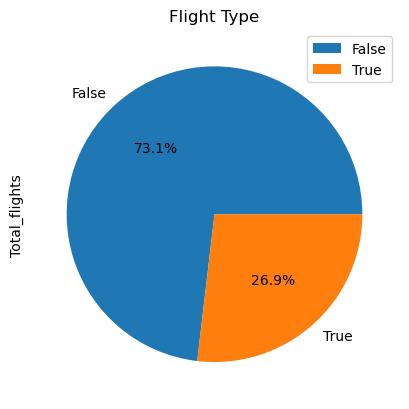

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.plot.pie(y='Total_flights', labels=df['isNonStop'], ax=ax, autopct='%1.1f%%')
ax.set_title("Flight Type")
plt.show()

Average of total fare per month

In [116]:
from pyspark.sql.functions import avg
grouped_df = joined_df.groupBy('month').agg(avg('totalFare').alias('average_totalFare'))
sorted_df = grouped_df.orderBy('month')

In [117]:
df = sorted_df.toPandas()
df.head()

,month,average_totalFare
0,4,354.533503
1,5,364.526044
2,6,400.161909
3,7,381.638449
4,8,330.082000


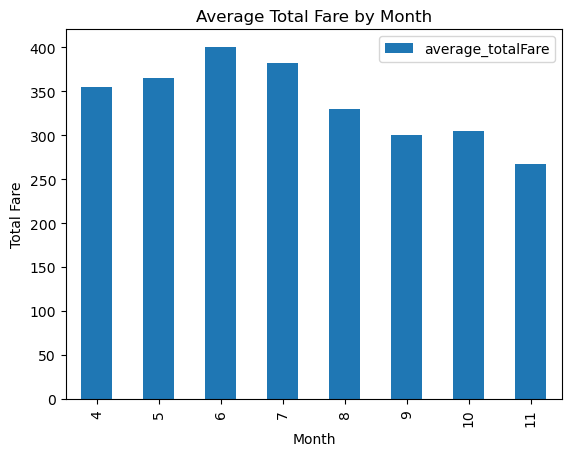

In [118]:
import matplotlib.pyplot as plt
df.plot.bar(x='month', y='average_totalFare')

plt.xlabel('Month')
plt.ylabel('Total Fare')
plt.title('Average Total Fare by Month')

plt.show()

Average of total fare by day of week

In [119]:
from pyspark.sql.functions import avg
grouped_df = joined_df.groupBy('day_of_week').agg(avg('totalFare').alias('average_totalFare'))
sorted_df = grouped_df.orderBy('day_of_week')

In [120]:
df = sorted_df.toPandas()
df.head()

,day_of_week,average_totalFare
0,1,401.379955
1,2,351.629488
2,3,297.041206
3,4,303.702789
4,5,346.980623


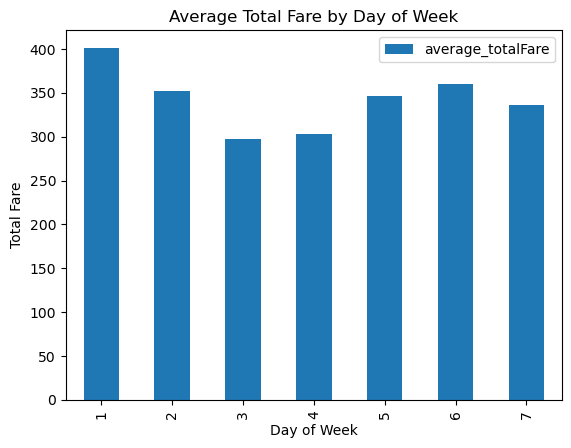

In [121]:
import matplotlib.pyplot as plt
df.plot.bar(x='day_of_week', y='average_totalFare')

plt.xlabel('Day of Week')
plt.ylabel('Total Fare')
plt.title('Average Total Fare by Day of Week')

plt.show()

1 as Sunday and 7 as Saturday

Average of total fare by day of month

In [122]:
from pyspark.sql.functions import avg
grouped_df = joined_df.groupBy('day').agg(avg('totalFare').alias('average_totalFare'))
sorted_df = grouped_df.orderBy('day')

In [123]:
df = sorted_df.toPandas()
df.head()

,day,average_totalFare
0,1,344.275809
1,2,341.832494
2,3,319.047872
3,4,311.958251
4,5,345.041704


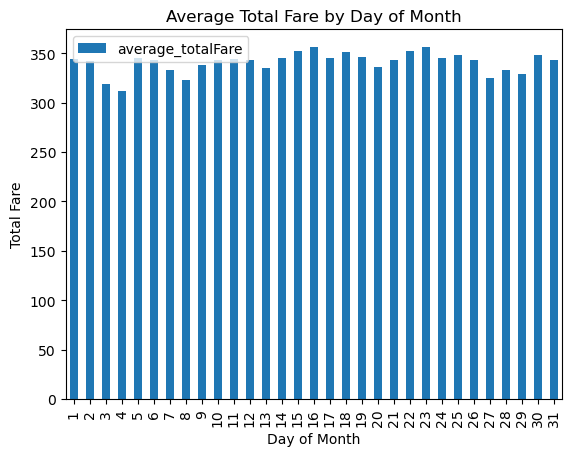

In [124]:
import matplotlib.pyplot as plt
df.plot.bar(x='day', y='average_totalFare')

plt.xlabel('Day of Month')
plt.ylabel('Total Fare')
plt.title('Average Total Fare by Day of Month')

plt.show()

Average of Total Fare by Departure Time

In [125]:
from pyspark.sql.functions import avg, when, hour

df = joined_df.withColumn('time_of_day', when(hour('DepartureTime').between(0, 5), 'night')
                       .when(hour('DepartureTime').between(6, 11), 'morning')
                       .when(hour('DepartureTime').between(12, 17), 'afternoon')
                       .when(hour('DepartureTime').between(18, 23), 'evening')
                       .otherwise('unknown'))

grouped_df = df.groupBy('time_of_day').agg(avg('TotalFare').alias('average_totalFare'))
sorted_df = grouped_df.orderBy(when(grouped_df["time_of_day"] == "morning", 1)
    .when(grouped_df["time_of_day"] == "afternoon", 2)
    .when(grouped_df["time_of_day"] == "evening", 3)
    .otherwise(4))

In [ ]:
df = sorted_df.toPandas()
df.head()

,time_of_day,average_totalFare
0,morning,330.005427
1,afternoon,352.631582
2,evening,326.637751
3,night,347.384881


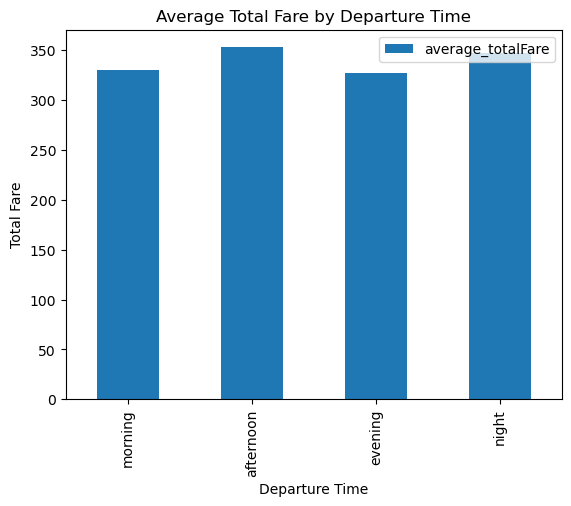

In [ ]:
import matplotlib.pyplot as plt
df.plot.bar(x='time_of_day', y='average_totalFare')

plt.xlabel('Departure Time')
plt.ylabel('Total Fare')
plt.title('Average Total Fare by Departure Time')

plt.show()

Average of Total Fare by Number of Stops

In [ ]:
from pyspark.sql.functions import avg
grouped_df = joined_df.groupBy('Segments').agg(avg('totalFare').alias('average_totalFare'))
sorted_df = grouped_df.orderBy('Segments')

In [ ]:
df = sorted_df.toPandas()
df.head()

,Segments,average_totalFare
0,1,251.148632
1,2,346.511575
2,3,549.994625
3,4,634.349777
4,5,865.807858


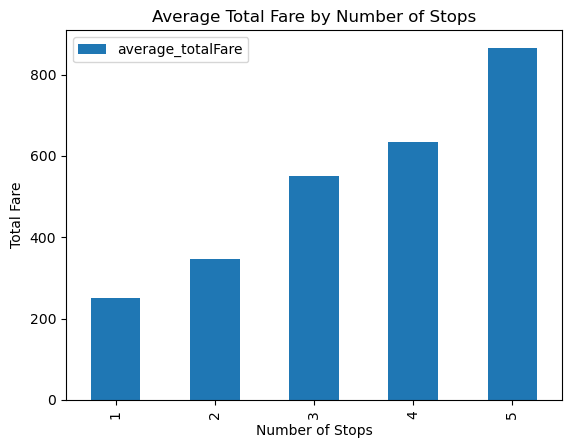

In [ ]:
import matplotlib.pyplot as plt
df.plot.bar(x='Segments', y='average_totalFare')

plt.xlabel('Number of Stops')
plt.ylabel('Total Fare')
plt.title('Average Total Fare by Number of Stops')

plt.show()

Total Fare distribution for each airline

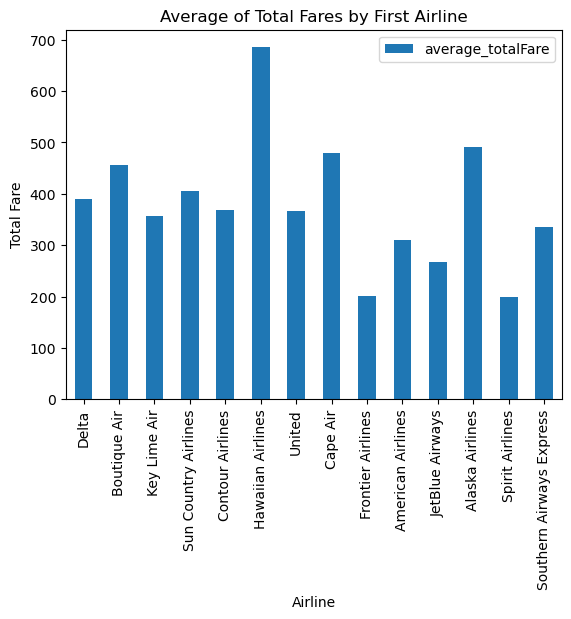

In [ ]:
joined_df = joined_df.withColumn("first_airline", split(joined_df["segmentsAirlineName"], "\|\|").getItem(0))
grouped_data = joined_df.groupBy("first_airline").agg(avg('totalFare').alias('average_totalFare'))

df = grouped_data.toPandas()

import matplotlib.pyplot as plt

df.plot.bar(x="first_airline", y="average_totalFare")
plt.title("Average of Total Fares by First Airline")
plt.xlabel("Airline")
plt.ylabel("Total Fare")
plt.show()

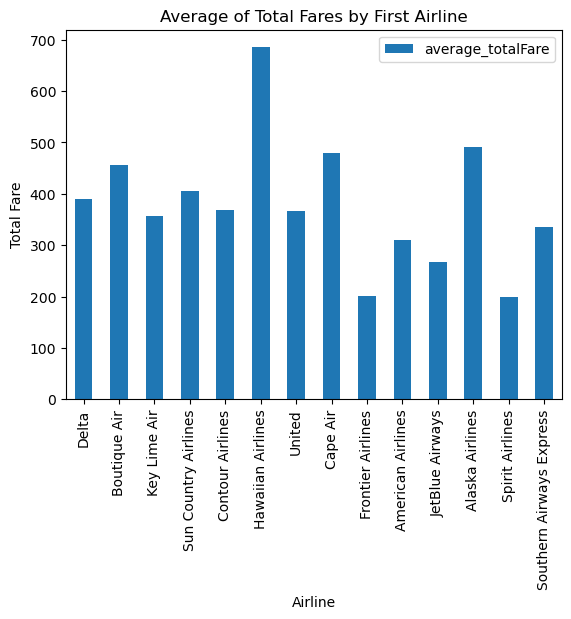

In [ ]:
import matplotlib.pyplot as plt

df.plot.bar(x="first_airline", y="average_totalFare")
plt.title("Average of Total Fares by First Airline")
plt.xlabel("Airline")
plt.ylabel("Total Fare")
plt.show()

In [ ]:
joined_df = joined_df.withColumn('time_of_day', when(hour('DepartureTime').between(0, 5), 'night')
                       .when(hour('DepartureTime').between(6, 11), 'morning')
                       .when(hour('DepartureTime').between(12, 17), 'afternoon')
                       .when(hour('DepartureTime').between(18, 23), 'evening')
                       .otherwise('unknown'))

In [ ]:
joined_df.printSchema()

root
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- first_airline: string (nullable = true)
 |-- time_of_day: string (nullable = false)



In [ ]:
#One hot encoding for isBasicEconomy, isNonStop, DepartureAirportCode, first_airline, ArrivalAirportCode, time_of_day; save it in different dataframe
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Define the categorical feature to be one-hot encoded
cat_feature = ['isBasicEconomy', 'isNonStop', 'DepartureAirportCode', 'first_airline', 'ArrivalAirportCode', 'time_of_day']

# Create a StringIndexer to convert the categorical feature to a numerical index
indexer = StringIndexer(inputCols=cat_feature, outputCols=[f"{col}_index" for col in cat_feature])

# Fit the StringIndexer to the data
indexer_model = indexer.fit(joined_df)

# Transform the data with the indexed categorical feature
indexed_data = indexer_model.transform(joined_df)

# Create a OneHotEncoder to one-hot encode the indexed categorical feature
encoder = OneHotEncoder(inputCols=[f"{col}_index" for col in cat_feature], outputCols=[f"{col}_encoded" for col in cat_feature])

# Fit the OneHotEncoder to the data
encoder_model = encoder.fit(indexed_data)

# Transform the data with the one-hot encoded categorical feature
encoded_data = encoder_model.transform(indexed_data)


In [ ]:
encoded_data.printSchema()

root
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- DepartureTime: timestamp (nullable = true)
 |-- DepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- ArrivalTime: timestamp (nullable = true)
 |-- ArrivalAirportCode: string (nullable = true)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- first_airline: string (nullable = true)
 |-- time_of_day: string (nullable = false)
 |-- isBasicEconomy_index: double (nullable = false)
 |-- isNonStop_index: double

In [ ]:
#encoded_data.select([col("segmentsAirlineName_encoded"), col("segmentsAirlineName"), col("segmentsAirlineName_index")]).show()


In [ ]:
encoded_data = encoded_data.drop("isBasicEconomy",'isNonStop','DepartureAirportCode','segmentsAirlineName', 'ArrivalAirportCode', 'first_airline', 'time_of_day')
encoded_data = encoded_data.drop("isBasicEconomy_encoded", 'isNonStop_encoded', 'DepartureAirportCode_encoded', 'first_airline_encoded', 'ArrivalAirportCode_encoded', 'time_of_day_encoded') 
encoded_data = encoded_data.drop("DepartureTime", 'ArrivalTime')
            
encoded_data.printSchema()


root
 |-- elapsedDays: integer (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- isBasicEconomy_index: double (nullable = false)
 |-- isNonStop_index: double (nullable = false)
 |-- DepartureAirportCode_index: double (nullable = false)
 |-- first_airline_index: double (nullable = false)
 |-- ArrivalAirportCode_index: double (nullable = false)
 |-- time_of_day_index: double (nullable = false)



In [ ]:
#joined_df.printSchema()

In [ ]:
#sampled_df.printSchema()

In [ ]:
from pyspark.sql.functions import isnull
encoded_data.select([count(when(isnull(c), c)).alias(c) for c in encoded_data.columns]).show()

+-----------+---------+--------------+-------------------+-----------------+-------------------+--------+---------------+-----+---+-----------+--------------------+---------------+--------------------------+-------------------+------------------------+-----------------+
|elapsedDays|totalFare|seatsRemaining|totalTravelDistance|date_diff_in_days|duration_in_minutes|Segments|Sentiment_score|month|day|day_of_week|isBasicEconomy_index|isNonStop_index|DepartureAirportCode_index|first_airline_index|ArrivalAirportCode_index|time_of_day_index|
+-----------+---------+--------------+-------------------+-----------------+-------------------+--------+---------------+-----+---+-----------+--------------------+---------------+--------------------------+-------------------+------------------------+-----------------+
|          0|        0|             0|            6094532|                0|            1845865|       0|              0|    0|  0|          0|                   0|              0|       

In [ ]:
encoded_data = encoded_data.na.drop(subset=["totalTravelDistance"])

In [ ]:
encoded_data = encoded_data.na.drop(subset=["duration_in_minutes"])

In [ ]:
encoded_data.printSchema()

root
 |-- elapsedDays: integer (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- isBasicEconomy_index: double (nullable = false)
 |-- isNonStop_index: double (nullable = false)
 |-- DepartureAirportCode_index: double (nullable = false)
 |-- first_airline_index: double (nullable = false)
 |-- ArrivalAirportCode_index: double (nullable = false)
 |-- time_of_day_index: double (nullable = false)



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

encoded_data = encoded_data.drop("features")

# Define the input features as a vector
feature_cols = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'date_diff_in_days',
                'duration_in_minutes', 'Segments', 'Sentiment_score', 'month', 'day',
                'day_of_week', 'isBasicEconomy_index', 'isNonStop_index', 
                'DepartureAirportCode_index', 'first_airline_index', 
                'ArrivalAirportCode_index', 'time_of_day_index']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
vectorizer_df = assembler.transform(encoded_data).select("totalFare", "features")

# Cache the dataframe
vectorizer_df.cache()

# Split the data into training and test sets
train_data, test_data = vectorizer_df.randomSplit([0.8, 0.2], seed=42)

# Define the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='totalFare', regParam=0.1)

# Create a RegressionEvaluator object to evaluate the model performance
evaluator = RegressionEvaluator(metricName='rmse', labelCol='totalFare')

lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Ensure that the 'totalFare' column is present in the predictions dataset
if 'totalFare' not in lr_predictions.columns:
    raise ValueError("Column 'totalFare' not found in predictions dataset!")
    
test_rmse = evaluator.evaluate(lr_predictions, {evaluator.labelCol: 'totalFare'})
test_r2 = evaluator.evaluate(lr_predictions, {evaluator.labelCol: 'totalFare', evaluator.metricName: 'r2'})

print('Test RMSE: ', test_rmse)
print('Test R-squared: ', test_r2)

23/03/07 02:02:36 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/03/07 02:02:36 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
23/03/07 02:02:36 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/03/07 02:02:36 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


Test RMSE:  145.93440768628153
Test R-squared:  0.45203670522728545


In [147]:
encoded_data.printSchema()

root
 |-- elapsedDays: integer (nullable = true)
 |-- totalFare: float (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- date_diff_in_days: integer (nullable = true)
 |-- duration_in_minutes: integer (nullable = true)
 |-- Segments: integer (nullable = false)
 |-- Sentiment_score: float (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- isBasicEconomy_index: double (nullable = false)
 |-- isNonStop_index: double (nullable = false)
 |-- DepartureAirportCode_index: double (nullable = false)
 |-- first_airline_index: double (nullable = false)
 |-- ArrivalAirportCode_index: double (nullable = false)
 |-- time_of_day_index: double (nullable = false)



In [149]:
from pyspark.sql.functions import rand

# Define the fraction of data to sample (10%)
fraction = 0.1

# Randomly select a fraction of the data
sampled_df = encoded_data.sample(withReplacement=False, fraction=fraction, seed=42)

# Save it to csv file
sampled_df.write.format("csv").option("header", "true").mode("overwrite").save("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/sample_data_rf")

In [150]:
encoded_data = spark.read.option("header", "true").option("mergeSchema", "true").csv("gs://msca-bdp-student-gcs/Group7_Final_Project_Data/sample_data_rf")


In [152]:
encoded_data.printSchema()

root
 |-- elapsedDays: string (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: string (nullable = true)
 |-- totalTravelDistance: string (nullable = true)
 |-- date_diff_in_days: string (nullable = true)
 |-- duration_in_minutes: string (nullable = true)
 |-- Segments: string (nullable = true)
 |-- Sentiment_score: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- isBasicEconomy_index: string (nullable = true)
 |-- isNonStop_index: string (nullable = true)
 |-- DepartureAirportCode_index: string (nullable = true)
 |-- first_airline_index: string (nullable = true)
 |-- ArrivalAirportCode_index: string (nullable = true)
 |-- time_of_day_index: string (nullable = true)



In [153]:
encoded_data = encoded_data.select(
    col("elapsedDays").cast("integer"),
    col("totalFare").cast("float"),
    col("seatsRemaining").cast("integer"),
    col("totalTravelDistance").cast("integer"),
    col("date_diff_in_days").cast("integer"),
    col("duration_in_minutes").cast("integer"),
    col("Segments").cast("integer"),
    col("Sentiment_score").cast("float"),
    col("month").cast("integer"),
    col("day").cast("integer"),
    col("day_of_week").cast("integer"),
    col("isBasicEconomy_index").cast("double"),
    col("isNonStop_index").cast("double"),
    col("DepartureAirportCode_index").cast("double"),
    col("first_airline_index").cast("double"),
    col("ArrivalAirportCode_index").cast("double"),
    col("time_of_day_index").cast("double")
)

In [157]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

encoded_data = encoded_data.drop("features")

# Define the input features as a vector
feature_cols = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'date_diff_in_days',
                'duration_in_minutes', 'Segments', 'Sentiment_score', 'month', 'day',
                'day_of_week', 'isBasicEconomy_index', 'isNonStop_index', 
                'DepartureAirportCode_index', 'first_airline_index', 
                'ArrivalAirportCode_index', 'time_of_day_index']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
vectorizer_df = assembler.transform(encoded_data).select("totalFare", "features")

# Define the random forest regression model
rf = RandomForestRegressor(featuresCol='features', labelCol='totalFare', seed=42, maxBins=40)

vectorizer_df.cache()
train_data, test_data = vectorizer_df.randomSplit([0.8, 0.2], seed=42)
rf_model = rf.fit(train_data)

# Evaluate the random forest model on the test data
rf_preds = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='totalFare', metricName='rmse')
rf_rmse = rf_evaluator.evaluate(rf_preds,{evaluator.labelCol: 'totalFare'})
rf_r2 = rf_evaluator.evaluate(rf_preds, {rf_evaluator.labelCol: 'totalFare', rf_evaluator.metricName: 'r2'} )
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest R2: ', rf_r2)

Random Forest RMSE:  139.19585072868284
Random Forest R2:  0.5005151674886441


In [ ]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import VectorAssembler

# Define the input features as a vector
feature_cols = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'date_diff_in_days',
                'duration_in_minutes', 'Segments', 'Sentiment_score', 'month', 'day',
                'day_of_week', 'isBasicEconomy_index', 'isNonStop_index', 
                'DepartureAirportCode_index', 'first_airline_index', 
                'ArrivalAirportCode_index', 'time_of_day_index']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
vectorizer_df = assembler.transform(encoded_data).select("totalFare", "features")

# Split data into training and test sets
train_data, test_data = vectorizer_df.randomSplit([0.8, 0.2], seed=42)

# Define the GBT regression model
gbt = GBTRegressor(featuresCol='features', labelCol='totalFare', seed=42)

# Set up a grid of hyperparameters to search over
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 40])
             .addGrid(gbt.stepSize, [0.01, 0.1])
             .build())

# Set up the cross-validation framework
cv = CrossValidator(estimator=gbt,
                    estimatorParamMaps=paramGrid,
                    evaluator=RegressionEvaluator(labelCol='totalFare', metricName='rmse'),
                    numFolds=3,
                    seed=42)

# Train the GBT model using cross-validation
gbt_model = cv.fit(train_data)

# Evaluate the GBT model on the test data
gbt_preds = gbt_model.transform(test_data)
gbt_evaluator = RegressionEvaluator(labelCol='totalFare', metricName='rmse')
gbt_rmse = gbt_evaluator.evaluate(gbt_preds)
gbt_r2 = gbt_evaluator.evaluate(gbt_preds, {gbt_evaluator.labelCol: 'totalFare', gbt_evaluator.metricName: 'r2'})
print('Gradient Boosted Trees RMSE: ', gbt_rmse)
print('Gradient Boosted Trees R2: ', gbt_r2)

Gradient Boosted Trees RMSE:  122.43745750965938
Gradient Boosted Trees R2:  0.6140517617588659
